## Project RFM Analysis

#### Este projeto envolve a aplicação da análise RFM (Recency, Frequency, Monetary Value) para segmentar clientes e avaliar seu comportamento de compra em uma empresa de ecommerce.

Dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [10]:
# Installs
# https://pypi.org/project/squarify/
!pip install -q squarify

In [11]:
# Imports
import sklearn
import squarify
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

In [12]:
# Import dataset
data = pd.read_csv('dataset.csv')

In [13]:
data.head(10)

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,seller_city,seller_state,product_category_name_english,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
3,ON40291,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,8,1,18,Tue,Aug
4,ON74313,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,...,Maua,SP,housewares,0.0,2017,8,2,18,Wed,Aug
5,ON09812,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1.0,...,Maua,SP,housewares,2.0,2017,10,0,23,Mon,Oct
6,ON35147,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,2.0,...,Maua,SP,housewares,1.0,2017,8,3,11,Thu,Aug
7,ON68327,1fa40f202d5d233b6491e976c557b822,50fd5707c28d0a64dc20d67f937dd9ba,delivered,2017-09-23 22:11:10,2017-09-23 22:25:11,2017-09-26 17:27:54,2017-10-19 21:09:21,2017-11-13 00:00:00,1.0,...,Maua,SP,housewares,3.0,2017,9,5,22,Sat,Sep
8,ON21665,41c045db2d1876be9f05cf4a787693b2,a286f46d6e54cc0179bbb0ee07b0df5e,delivered,2017-08-16 14:06:30,2017-08-16 14:55:20,2017-08-18 15:41:40,2017-08-21 15:05:13,2017-08-29 00:00:00,1.0,...,Maua,SP,housewares,4.0,2017,8,2,14,Wed,Aug
9,ON18014,a60241fca336b3f14485dff30a172cab,2a3caad976ff659d519660a7c9357122,delivered,2018-07-27 22:05:26,2018-07-27 22:24:21,2018-07-30 09:15:00,2018-08-02 13:45:01,2018-08-20 00:00:00,1.0,...,Limeira,SP,housewares,0.0,2018,7,4,22,Fri,Jul


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116581 non-null  object 
 1   order_id3                      116581 non-null  object 
 2   customer_id3                   116581 non-null  object 
 3   order_status                   116581 non-null  object 
 4   order_purchase_timestamp       116581 non-null  object 
 5   order_approved_at              116581 non-null  object 
 6   order_delivered_carrier_date   116581 non-null  object 
 7   order_delivered_customer_date  116581 non-null  object 
 8   order_estimated_delivery_date  116581 non-null  object 
 9   order_item_id                  116581 non-null  float64
 10  product_id3                    116581 non-null  object 
 11  seller_id3                     116581 non-null  object 
 12  shipping_limit_date           

In [15]:
### Trabalhando colunas Data para análise
# Converte para tipo Date Time
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

In [16]:
data['order_purchase_timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 116581 entries, 0 to 116580
Series name: order_purchase_timestamp
Non-Null Count   Dtype         
--------------   -----         
116581 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 910.9 KB


In [17]:
# Extraindo somente a data.
data['order_purchase_date'] = data['order_purchase_timestamp'].dt.date

In [18]:
data['order_purchase_date']

0         2017-10-02
1         2017-10-02
2         2017-10-02
3         2017-08-15
4         2017-08-02
             ...    
116576    2018-07-11
116577    2018-05-16
116578    2018-06-13
116579    2018-08-07
116580    2017-02-19
Name: order_purchase_date, Length: 116581, dtype: object

In [19]:
# Criando novas colunas 
data['InvoiceDate'] = data.order_purchase_date.apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [20]:
data.head()

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,product_category_name_english,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,order_purchase_date,InvoiceDate
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,housewares,1.0,2017,10,0,10,Mon,Oct,2017-10-02,2017-10-02
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,housewares,1.0,2017,10,0,10,Mon,Oct,2017-10-02,2017-10-02
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,housewares,1.0,2017,10,0,10,Mon,Oct,2017-10-02,2017-10-02
3,ON40291,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,...,housewares,1.0,2017,8,1,18,Tue,Aug,2017-08-15,2017-08-15
4,ON74313,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,...,housewares,0.0,2017,8,2,18,Wed,Aug,2017-08-02,2017-08-02


In [21]:
data.tail()

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,product_category_name_english,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,order_purchase_date,InvoiceDate
116576,ON07986,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,2018-07-13 19:02:36,2018-07-20 20:33:29,2018-07-20 00:00:00,1.0,...,books imported,2.0,2018,7,2,22,Wed,Jul,2018-07-11,2018-07-11
116577,ON72724,1dbff949801376b8795a093d31cfe205,0cbd2df3d6e9d8b1eaf5cfefc44886bc,delivered,2018-05-16 14:50:54,2018-05-16 15:18:42,2018-05-18 12:10:00,2018-05-21 17:14:08,2018-05-28 00:00:00,1.0,...,books imported,0.0,2018,5,2,14,Wed,May,2018-05-16,2018-05-16
116578,ON15901,6775b950cdc4da0ce39b261032f92c84,c4d135422be0d4333f506acde8af9419,delivered,2018-06-13 12:19:26,2018-06-13 17:39:14,2018-06-15 13:09:00,2018-06-16 17:48:30,2018-06-28 00:00:00,1.0,...,books imported,0.0,2018,6,2,12,Wed,Jun,2018-06-13,2018-06-13
116579,ON44476,73d60420cd1a179b2d8887d538efe4c2,65d9213dfa004c17dc126503e106e4a3,delivered,2018-08-07 10:52:58,2018-08-07 11:05:18,2018-08-08 08:31:00,2018-08-22 17:02:23,2018-09-04 00:00:00,1.0,...,books imported,2.0,2018,8,1,10,Tue,Aug,2018-08-07,2018-08-07
116580,ON08855,f5cf5716413185387030a378bdd46ebe,ff95df9a387c8d032a2ca6887cf77236,processing,2017-02-19 22:31:47,2017-02-19 22:45:13,2017-02-21 19:02:06,2017-02-28 20:32:59,2017-03-21 00:00:00,1.0,...,books imported,0.0,2017,2,6,22,Sun,Feb,2017-02-19,2017-02-19


In [22]:
#
print('{:,} Linhas; {:,} Colunas'.format(data.shape[0], data.shape[1]))
print('{:,} Transações não tem customer id'.format(data[data.customer_unique_id.isnull()].shape[0]))
print('Datas das Transações de {} a {}'.format(data['InvoiceDate'].min(), data['InvoiceDate'].max()))

116,581 Linhas; 55 Colunas
0 Transações não tem customer id
Datas das Transações de 2016-09-04 00:00:00 a 2018-09-03 00:00:00


##### Definindo a data mais recente adicionando mais um dia, para criar um ponto de referência para calcular a recência.

In [23]:
## Definindo data mais recente
most_recent_date = data['InvoiceDate'].max() + timedelta(days= 1)
most_recent_date

Timestamp('2018-09-04 00:00:00')

In [24]:
# Agrupando por Customer ID
data_agg = data.groupby(['customer_unique_id']).agg({'InvoiceDate': lambda x: (most_recent_date - x.max()).days, 'order_id': 'count', 'payment_value':'sum'})

In [29]:
data_agg.rename(columns= {'InvoiceDate': 'Recency', 'order_id': 'Frequency', 'payment_value': 'Monetary'}, inplace=True)

In [30]:
data_agg.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
C00001,73,1,121.82
C00002,66,1,155.76
C00003,337,1,181.55
C00004,193,1,90.78
C00005,283,1,266.89


In [31]:
data_agg.sample(10)

,Recency,Frequency,Monetary
customer_unique_id,,,
C45355,111,1,181.69
C20185,383,1,24.10
C79761,75,1,144.89
C96805,164,1,154.85
C50431,196,2,113.43
C40182,15,1,39.99
C38424,45,1,220.86
C15132,233,1,102.03
C55639,100,1,159.60


In [32]:
# Verificando valores ausentes
data_agg.isna().any()

Recency      False
Frequency    False
Monetary     False
dtype: bool

In [33]:
# Resumo estatístico
data_agg['Recency'].describe()

count    94087.000000
mean       243.803575
std        153.156983
min          1.000000
25%        120.000000
50%        224.000000
75%        353.000000
max        730.000000
Name: Recency, dtype: float64

In [34]:
data_agg['Frequency'].describe()

count    94087.000000
mean         1.239077
std          0.850594
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         75.000000
Name: Frequency, dtype: float64

In [36]:
data_agg['Frequency'].value_counts()

Frequency
1     79915
2     10323
3      2003
4       956
5       337
6       300
7        73
8        45
10       25
9        25
12       25
11       18
14        8
15        7
24        7
20        4
13        4
21        3
22        1
38        1
26        1
75        1
18        1
19        1
29        1
16        1
35        1
Name: count, dtype: int64

In [35]:
data_agg['Monetary'].describe()

count     94087.000000
mean        214.249054
std         647.368039
min           9.590000
25%          64.000000
50%         113.150000
75%         203.770000
max      109312.640000
Name: Monetary, dtype: float64

In [37]:
##  Aplicando método .qcut() para atribuir o percentil relativo aos recursos RFM.

# Criando labels para Recency
r_labels = range(4, 0, -1)

In [38]:
# Atribuindo os rótulos a 4 grupos de percentis
r_groups = pd.qcut(data_agg['Recency'], q= 4, labels= r_labels)

In [39]:
r_groups.value_counts()

Recency
4    23766
2    23563
1    23440
3    23318
Name: count, dtype: int64

In [40]:
# Criando coluna R no dataframe

data_agg = data_agg .assign(R = r_groups.values)

In [61]:
## Amostra
data_agg.sample(10)

,Recency,Frequency,Monetary,R
customer_unique_id,,,,
C78769,259,1,659.84,2
C93551,348,2,262.84,2
C04069,190,2,212.58,3
C42839,376,1,161.23,1
C31227,581,1,149.90,1
C67018,262,1,51.59,2
C54658,97,1,205.99,4
C17500,454,1,95.21,1
C30751,327,2,715.24,2


In [62]:
## Para frequencia 2 grupos, os que compraram apenas uma vez, e os que compraram mais de uma vez

data_agg['Frequency'].describe()

count    94087.000000
mean         1.239077
std          0.850594
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         75.000000
Name: Frequency, dtype: float64

In [63]:
## Criando labels para Frequency
f_labels = range(1, 3)

In [64]:
## Function

def pct_rank_qcut(series, n):
    edges = pd.Series([float(i) / n for i in range (n +1)])
    
    f = lambda x: (edges >= x).values.argmax()
    
    return series.rank(pct = 1).apply(f)

In [66]:
f_groups = pct_rank_qcut(data_agg['Frequency'], 2)

In [67]:
f_groups.value_counts()

Frequency
1    79915
2    14172
Name: count, dtype: int64

In [68]:
# Cria coluna F no dataframe
data_agg = data_agg.assign(F = f_groups.values)

In [78]:
data_agg.sample(10)

,Recency,Frequency,Monetary,R,F
customer_unique_id,,,,,
C09696,294,1,40.10,2,1
C25007,74,1,71.39,4,1
C54811,407,1,155.73,1,1
C63988,373,1,77.57,1,1
C44393,499,1,136.05,1,1
C65557,290,1,368.60,2,1
C70576,68,2,348.70,4,2
C29489,451,1,247.05,1,1
C28544,477,1,42.00,1,1


In [79]:
# Criando labels para Monetary
m_labels = range(1, 5)

In [80]:
m_groups = pd.qcut(data_agg['Monetary'], q = 4, labels= m_labels)

In [81]:
m_groups.value_counts()

Monetary
1    23569
4    23521
3    23503
2    23494
Name: count, dtype: int64

In [82]:
# Cria nova coluna M
data_agg = data_agg.assign(M = m_groups.values)

In [91]:
data_agg.sample(10)

,Recency,Frequency,Monetary,R,F,M
customer_unique_id,,,,,,
C27095,151,1,121.68,3,1,3
C28984,595,1,66.99,1,1,2
C28245,28,1,146.11,4,1,3
C91570,19,1,42.06,4,1,1
C50685,105,1,52.39,4,1,1
C52930,442,1,532.55,1,1,4
C10314,187,2,634.52,3,2,4
C95868,20,1,136.64,4,1,3
C33171,87,1,62.15,4,1,1


In [92]:
data_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94087 entries, C00001 to C96999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    94087 non-null  int64   
 1   Frequency  94087 non-null  int64   
 2   Monetary   94087 non-null  float64 
 3   R          94087 non-null  category
 4   F          94087 non-null  int64   
 5   M          94087 non-null  category
dtypes: category(2), float64(1), int64(3)
memory usage: 5.8+ MB


In [ ]:
# Converte tipo R e M para inteiro com label encoding
data_le = LabelEncoder()

In [94]:
data_agg['R'] = data_le.fit_transform(data_agg['R']) + 1
data_agg['M'] = data_le.fit_transform(data_agg['M']) + 1

In [95]:
data_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94087 entries, C00001 to C96999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    94087 non-null  int64  
 1   Frequency  94087 non-null  int64  
 2   Monetary   94087 non-null  float64
 3   R          94087 non-null  int64  
 4   F          94087 non-null  int64  
 5   M          94087 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 7.0+ MB


In [96]:
## Criando os Segmentos RFM
# Cria o RFM Score
data_agg['Score_RFM'] = data_agg[['R', 'F', 'M']].sum(axis=1)

In [97]:
data_agg.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM
customer_unique_id,,,,,,,
C00001,73,1,121.82,4,1,3,8
C00002,66,1,155.76,4,1,3,8
C00003,337,1,181.55,2,1,3,6
C00004,193,1,90.78,3,1,2,6
C00005,283,1,266.89,2,1,4,7


In [100]:
## Concatenando os valores RFM para gerar o segmentos de RFM
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

In [101]:
data_agg['Segment_RFM'] = data_agg.apply(join_rfm, axis=1)

In [102]:
data_agg.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segment_RFM
customer_unique_id,,,,,,,,
C00001,73,1,121.82,4,1,3,8,4.01.03.0
C00002,66,1,155.76,4,1,3,8,4.01.03.0
C00003,337,1,181.55,2,1,3,6,2.01.03.0
C00004,193,1,90.78,3,1,2,6,3.01.02.0
C00005,283,1,266.89,2,1,4,7,2.01.04.0


In [103]:
data_agg['Segment_RFM'] = data_agg.apply(join_rfm, axis=1)

In [104]:
data_agg.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segment_RFM
customer_unique_id,,,,,,,,
C00001,73,1,121.82,4,1,3,8,413
C00002,66,1,155.76,4,1,3,8,413
C00003,337,1,181.55,2,1,3,6,213
C00004,193,1,90.78,3,1,2,6,312
C00005,283,1,266.89,2,1,4,7,214


In [105]:
## Contagem de número de segmentos unicos
rfm_count_unique = data_agg.groupby('Segment_RFM')['Segment_RFM'].nunique()

In [107]:
rfm_count_unique.sum()

32

In [108]:
## Copia dataframe
rfm = data_agg

In [109]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segment_RFM
customer_unique_id,,,,,,,,
C00001,73,1,121.82,4,1,3,8,413
C00002,66,1,155.76,4,1,3,8,413
C00003,337,1,181.55,2,1,3,6,213
C00004,193,1,90.78,3,1,2,6,312
C00005,283,1,266.89,2,1,4,7,214


In [110]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94087 entries, C00001 to C96999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      94087 non-null  int64  
 1   Frequency    94087 non-null  int64  
 2   Monetary     94087 non-null  float64
 3   R            94087 non-null  int64  
 4   F            94087 non-null  int64  
 5   M            94087 non-null  int64  
 6   Score_RFM    94087 non-null  int64  
 7   Segment_RFM  94087 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 8.5+ MB


In [113]:
# Ajusta o tipo de dado
rfm['Segment_RFM'] = rfm['Segment_RFM'].astype(str).astype('Int64')

In [114]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94087 entries, C00001 to C96999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      94087 non-null  int64  
 1   Frequency    94087 non-null  int64  
 2   Monetary     94087 non-null  float64
 3   R            94087 non-null  int64  
 4   F            94087 non-null  int64  
 5   M            94087 non-null  int64  
 6   Score_RFM    94087 non-null  int64  
 7   Segment_RFM  94087 non-null  Int64  
dtypes: Int64(1), float64(1), int64(6)
memory usage: 8.6+ MB


In [115]:
rfm.describe()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segment_RFM
count,94087.000000,94087.000000,94087.000000,94087.000000,94087.000000,94087.000000,94087.000000,94087.0
mean,243.803575,1.239077,214.249054,2.503895,1.150627,2.499283,6.153804,264.395081
std,153.156983,0.850594,647.368039,1.119577,0.357686,1.118482,1.715630,112.037091
min,1.000000,1.000000,9.590000,1.000000,1.000000,1.000000,3.000000,111.0
25%,120.000000,1.000000,64.000000,2.000000,1.000000,1.000000,5.000000,211.0
50%,224.000000,1.000000,113.150000,3.000000,1.000000,2.000000,6.000000,311.0
75%,353.000000,1.000000,203.770000,4.000000,1.000000,3.000000,7.000000,411.0
max,730.000000,75.000000,109312.640000,4.000000,2.000000,4.000000,10.000000,424.0


### Segmentando Clientes

In [118]:
# Funcao para criar os níveis de RFM

def rfm_level(df):
    if (df['Segment_RFM'] >= 424 | (df['Score_RFM'] >= 9)) :
        return 'Clientes VIP'
    elif ((df['Score_RFM'] >= 8) & (df['M'] == 4)) :
        return 'Clientes Leais que Compram com Frequência'
    elif ((df['Score_RFM'] >= 6) & (df['F'] >= 2)) :
        return 'Clientes Leais'
    elif ((df['Score_RFM'] <= 4) & (df['R'] == 1)) :
        return 'Clientes Quase Perdidos'
    elif ((df['Segment_RFM'] >= 221) | (df['Score_RFM'] >= 6)) :
        return 'Potenciais Clientes Leais'
    elif ((df['Segment_RFM'] >= 121) & (df['R'] == 1) | (df['Score_RFM'] == 5)) :
        return 'Clientes Precisam de Atenção'
    else:
        return 'Clientes Perdidos'

In [119]:
# Funcao para acoes RFM

def rfm_action(df):
    if (df['Segment_RFM'] >= 424 | (df['Score_RFM'] >= 9)) :
        return 'Incentivos não relacionados a preços; Oferecer edição limitada e programas de fidelidade'
    
    elif ((df['Score_RFM'] >= 8) & (df['M'] == 4)):
        return 'Oferecer itens mais caros (Upsell)'
    
    elif ((df['Score_RFM'] >= 6) & (df['F'] >= 2)):
        return 'Oferecer programas de fidelidade e venda cruzada (Cross-Sell)'
    
    elif ((df['Score_RFM'] <= 4) & (df['R'] == 1)):
        return 'Oferecer Incentivos de preços agressivos'
    
    elif ((df['Segment_RFM'] >= 221) | (df['Score_RFM'] >= 6)):
        return 'Recomendações de venda cruzada e cupons de desconto'
    
    elif (((df['Segment_RFM'] >= 121) & (df['R'] == 1)) | (df['Score_RFM'] == 5)):
        return 'Incentivos de preço e oferta por tempo limitado'
    
    else:
        return 'Não gaste muito tentando readquirir esse cliente'

In [116]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segment_RFM
customer_unique_id,,,,,,,,
C00001,73,1,121.82,4,1,3,8,413
C00002,66,1,155.76,4,1,3,8,413
C00003,337,1,181.55,2,1,3,6,213
C00004,193,1,90.78,3,1,2,6,312
C00005,283,1,266.89,2,1,4,7,214


In [120]:
# Aplicando a funcao e criando nova variavel 'Segmento Cliente'

rfm['Client_Segment'] = rfm.apply(rfm_level, axis= 1)

In [125]:
rfm['Marketing_Action'] = rfm.apply(rfm_action, axis=1)

In [126]:
rfm.sample(10)

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segment_RFM,Client_Segment,Marketing_Action
customer_unique_id,,,,,,,,,,
C20637,491,1,134.94,1,1,3,5,113,Clientes Precisam de Atenção,Incentivos de preço e oferta por tempo limitado
C12312,47,1,159.08,4,1,3,8,413,Potenciais Clientes Leais,Recomendações de venda cruzada e cupons de des...
C84538,373,2,122.16,1,2,3,6,123,Clientes Leais,Oferecer programas de fidelidade e venda cruza...
C54653,386,1,41.75,1,1,1,3,111,Clientes Quase Perdidos,Oferecer Incentivos de preços agressivos
C03848,274,1,211.60,2,1,4,7,214,Potenciais Clientes Leais,Recomendações de venda cruzada e cupons de des...
C40486,93,1,364.89,4,1,4,9,414,Clientes Leais que Compram com Frequência,Oferecer itens mais caros (Upsell)
C42399,250,1,250.40,2,1,4,7,214,Potenciais Clientes Leais,Recomendações de venda cruzada e cupons de des...
C26076,284,1,131.73,2,1,3,6,213,Potenciais Clientes Leais,Recomendações de venda cruzada e cupons de des...
C21085,432,1,352.70,1,1,4,6,114,Potenciais Clientes Leais,Recomendações de venda cruzada e cupons de des...


In [130]:
rfm['Client_Segment'].value_counts(normalize=True)*100

Client_Segment
Potenciais Clientes Leais                    48.275532
Clientes Leais que Compram com Frequência    15.144494
Clientes Quase Perdidos                      12.323700
Clientes Precisam de Atenção                 11.737009
Clientes Leais                                6.526938
Clientes Perdidos                             5.992326
Name: proportion, dtype: float64

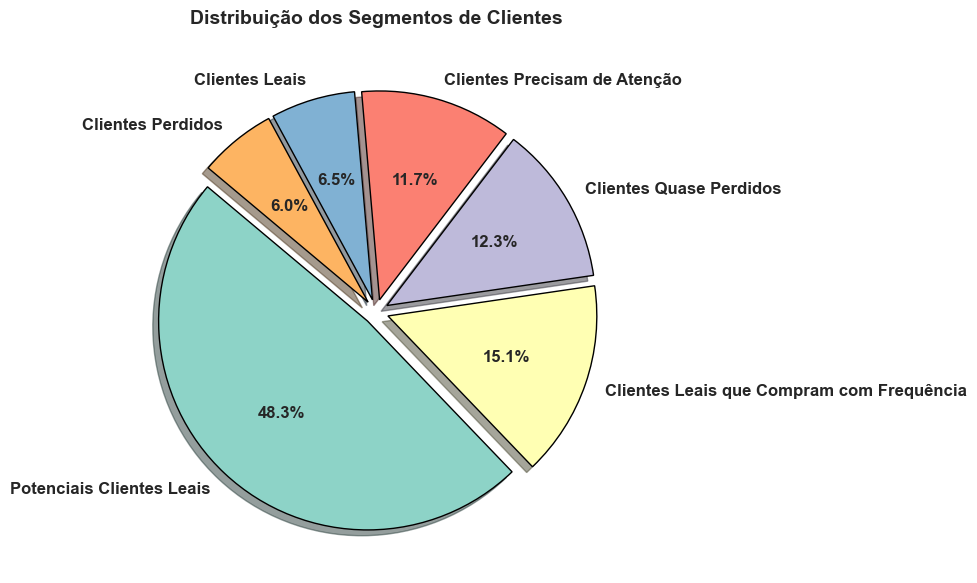

In [156]:


# Configuração das cores
colors = sns.color_palette("Set3")

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Criando o gráfico de pizza
wedges, texts, autotexts = ax.pie(
    rfm['Client_Segment'].value_counts(),
    labels=rfm['Client_Segment'].value_counts().index,
    autopct='%1.1f%%',
    colors=colors,
    explode=[0.06] * len(rfm['Client_Segment'].value_counts()),  # Destaca cada fatia
    startangle=140,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    shadow=True
)

# Melhorando a aparência dos textos
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Ajuste do título
plt.title('Distribuição dos Segmentos de Clientes', fontsize=14, fontweight='bold', pad=20)

# Ajuste para evitar cortes no gráfico
plt.tight_layout()

# Exibir gráfico
plt.show()

In [136]:
rfm['Marketing_Action'].value_counts()

Marketing_Action
Recomendações de venda cruzada e cupons de desconto              45421
Oferecer itens mais caros (Upsell)                               14249
Oferecer Incentivos de preços agressivos                         11595
Incentivos de preço e oferta por tempo limitado                  11043
Oferecer programas de fidelidade e venda cruzada (Cross-Sell)     6141
Não gaste muito tentando readquirir esse cliente                  5638
Name: count, dtype: int64

In [141]:
rfm.to_csv('rfm.csv')

In [142]:
rfm_level_agg = rfm.groupby(['Client_Segment']).agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': ['mean', 'count'], 'Marketing_Action': 'unique'}).round(1 )

In [143]:
rfm_level_agg

Recency Frequency Monetary         \
                                             mean      mean     mean  count   
Client_Segment                                                                
Clientes Leais                              305.2       2.4    356.9   6141   
Clientes Leais que Compram com Frequência   146.1       1.9    619.3  14249   
Clientes Perdidos                           281.9       1.0     44.2   5638   
Clientes Precisam de Atenção                368.5       1.0    114.9  11043   
Clientes Quase Perdidos                     457.3       1.0     64.2  11595   
Potenciais Clientes Leais                   176.6       1.0    151.5  45421   

                                                                            Marketing_Action  
                                                                                      unique  
Client_Segment                                                                                
Clientes Leais                             [Oferecer programas de fidelidade e venda cruz...  
Clientes Leais que Compram com Frequência               [Oferecer itens mais caros (Upsell)]  
Clientes Perdidos                          [Não gaste muito tentando readquirir esse clie...  
Clientes Precisam de Atenção               [Incentivos de preço e oferta por tempo limitado]  
Clientes Quase Perdidos                           [Oferecer Incentivos de preços agressivos]  
Potenciais Clientes Leais                  [Recomendações de venda cruzada e cupons de de...

In [144]:
# Ajuste do dataframe e reset do indice

rfm_level_ag = pd.DataFrame(rfm_level_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

Client_Segment Recency Frequency Monetary  \
                                                mean      mean     mean   
0                             Clientes Leais   305.2       2.4    356.9   
1  Clientes Leais que Compram com Frequência   146.1       1.9    619.3   
2                          Clientes Perdidos   281.9       1.0     44.2   
3               Clientes Precisam de Atenção   368.5       1.0    114.9   
4                    Clientes Quase Perdidos   457.3       1.0     64.2   
5                  Potenciais Clientes Leais   176.6       1.0    151.5   

                                           Marketing_Action  
   count                                             unique  
0   6141  [Oferecer programas de fidelidade e venda cruz...  
1  14249               [Oferecer itens mais caros (Upsell)]  
2   5638  [Não gaste muito tentando readquirir esse clie...  
3  11043  [Incentivos de preço e oferta por tempo limitado]  
4  11595         [Oferecer Incentivos de preços agressivos]  
5  45421  [Recomendações de venda cruzada e cupons de de...

**Recomendações Para a Área de Negócio:**

**Clientes Leais** - São os clientes mais leais. Eles são ativos com compras frequentes e alto valor monetário. Eles podem ser os evangelistas da marca e a empresa deve se concentrar em servi-los muito bem. Eles podem ser os melhores clientes para obter feedback sobre o lançamento de qualquer novo produto ou ser os primeiros a adotar ou promover novos produtos/serviços.

**Potenciais Clientes Leais** - Alto potencial para entrar em nossos segmentos de clientes fiéis, por que não oferecer alguns brindes em sua próxima compra para mostrar que você os valoriza?

**Clientes Que Precisam de Atenção** - Mostrando sinais promissores com a quantidade e valor de sua compra, mas já faz um tempo que não compram. Vamos direcioná-los para seus itens da lista de desejos e um desconto com oferta por tempo limitado.

**Clientes Quase Perdidos** - Fizeram algumas compras iniciais, mas não voltaram desde então. Foi uma experiência ruim para o cliente? Ou adequação ao mercado do produto? Vamos gastar alguns recursos para construir o conhecimento de nossa marca com eles?

**Clientes Leais Que Compram com Frequência** - É sempre uma boa ideia tratar cuidadosamente todos os novos clientes, mas como esses clientes gastaram muito em suas compras, são ainda mais valiosos. É importante fazer com que eles se sintam valorizados e apreciados - e dar-lhes incentivos incríveis para continuar a interagir com a marca.

**Clientes VIP** - Buscam e querem mais do que preço. Programa de fidelidade ou produto/serviço exclusivo ou limitado são opções para manter esses clientes.

### Dashboard

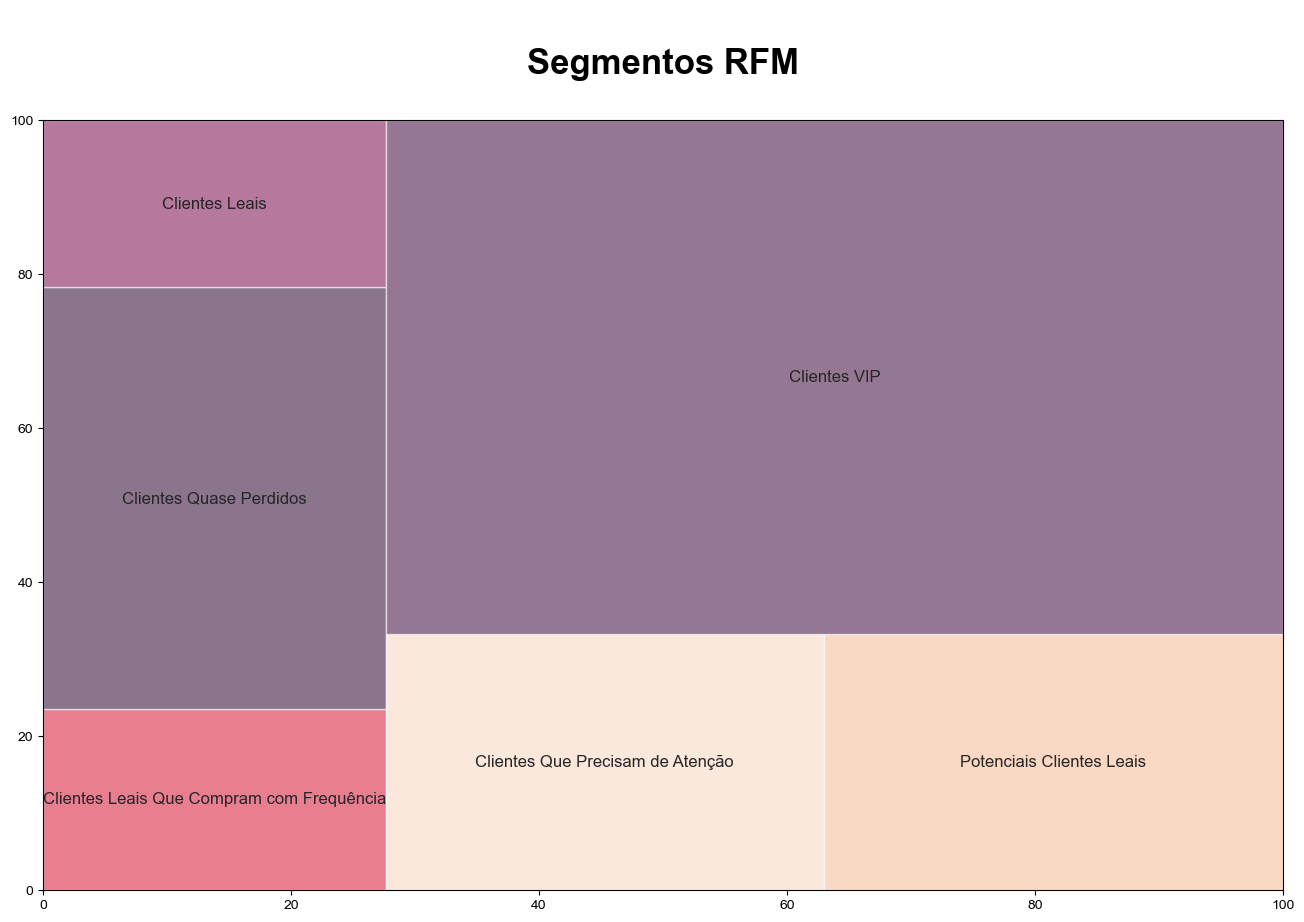

In [148]:
#Plot
rfm_level_agg.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count', 'MarketingAction']
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
sns.set(color_codes = True, style = 'whitegrid')
squarify.plot(sizes = rfm_level_agg['Count'], 
              label = ['Clientes Leais Que Compram com Frequência',
                       'Clientes Quase Perdidos',
                       'Clientes Leais',
                       'Clientes Que Precisam de Atenção',
                       'Potenciais Clientes Leais',
                       'Clientes VIP'], alpha=.6 )

plt.title("\nSegmentos RFM\n", fontsize = 25, fontweight = "bold")
plt.axis('on')
plt.show()

In [157]:
import plotly.graph_objects as go

# Criando a figura com melhorias visuais
fig = go.Figure(go.Treemap(
    labels=rfm_level_ag['Client_Segment'],
    parents=['Client_Segment'] * len(rfm_level_ag),  # Mantém a hierarquia correta
    values=rfm_level_ag[('Monetary', 'count')],
    marker=dict(colorscale='Viridis'),  # Paleta de cores mais agradável
    textinfo='label+value+percent entry',  # Exibir rótulo, valores e porcentagem
    hoverinfo='label+value+percent parent'  # Tooltip detalhado
))

# Ajustando o layout para melhor visualização
fig.update_layout(
    title_text="Distribuição dos Segmentos de Clientes",
    title_x=0.5,  # Centralizar o título
    font=dict(size=14, family="Arial, sans-serif"),  # Ajuste da fonte
    margin=dict(t=50, l=25, r=25, b=25)  # Margens para evitar cortes
)

# Exibir gráfico
fig.show()
